In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Load the dataset
data = pd.read_csv("/content/usd-inr excel.csv")

In [43]:
# Display the first few rows of the dataset
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2023-03-27  82.338799  82.428299  82.240601  82.338799  82.338799       0
1  2023-03-28  82.214897  82.373299  82.079498  82.214897  82.214897       0
2  2023-03-29  82.164299  82.364998  82.146004  82.164299  82.164299       0
3  2023-03-30  82.255402  82.279099  82.031998  82.255402  82.255402       0
4  2023-03-31  82.100502  82.311897  82.029503  82.100502  82.100502       0


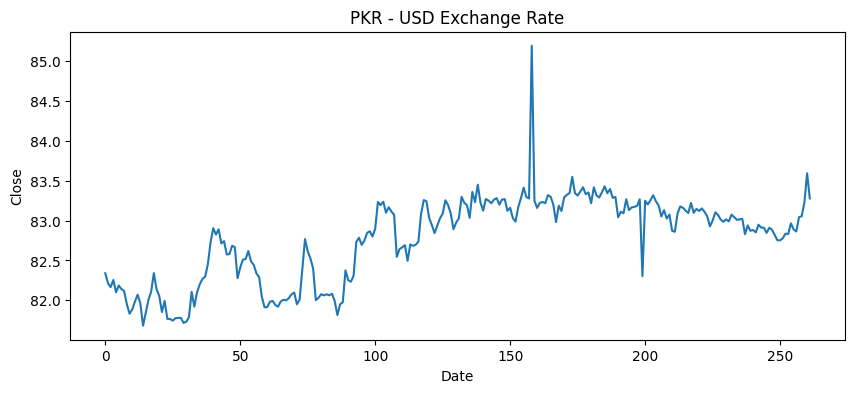

In [44]:
# Visualize the PKR - USD Exchange Rate
plt.figure(figsize=(10, 4))
plt.title("PKR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()


In [45]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [46]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-27,82.338799,82.428299,82.240601,82.338799,82.338799,0
1,2023-03-28,82.214897,82.373299,82.079498,82.214897,82.214897,0
2,2023-03-29,82.164299,82.364998,82.146004,82.164299,82.164299,0
3,2023-03-30,82.255402,82.279099,82.031998,82.255402,82.255402,0
4,2023-03-31,82.100502,82.311897,82.029503,82.100502,82.100502,0


In [47]:
import pandas as pd

# Assuming your DataFrame is named 'data'
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day



               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.713265  0.681233  0.694445  0.712515   0.712515   
Open       0.713265  1.000000  0.925001  0.869465  0.999922   0.999922   
High       0.681233  0.925001  1.000000  0.859380  0.924940   0.924940   
Low        0.694445  0.869465  0.859380  1.000000  0.869323   0.869323   
Close      0.712515  0.999922  0.924940  0.869323  1.000000   1.000000   
Adj Close  0.712515  0.999922  0.924940  0.869323  1.000000   1.000000   
Volume          NaN       NaN       NaN       NaN       NaN        NaN   
Year       0.736247  0.275262  0.239317  0.302353  0.274099   0.274099   
Month     -0.083933  0.311004  0.331554  0.250237  0.312039   0.312039   
Day       -0.002353 -0.029425 -0.023450 -0.007548 -0.030337  -0.030337   

           Volume      Year     Month       Day  
Date          NaN  0.736247 -0.083933 -0.002353  
Open          NaN  0.275262  0.311004 -0.029425  
High          NaN  0.239317  0.3315

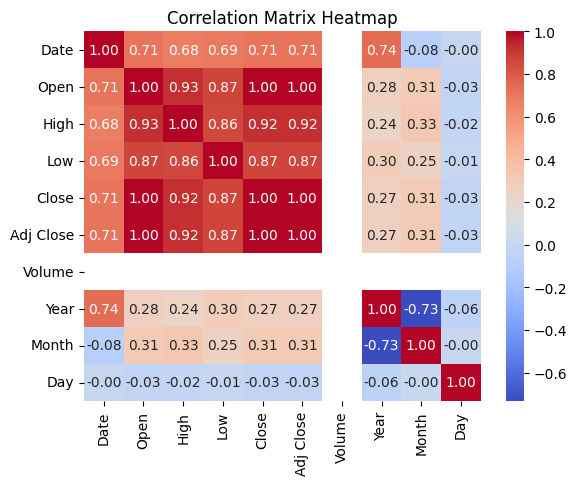

In [48]:
# Check the correlation between variables
print(data.corr())

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [49]:
# Define features (X) and target variable (y)
X = data[["Open", "High", "Low"]]
y = data["Close"]

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [52]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [53]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [54]:
# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [55]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R-squared: {r2}")

In [56]:
# Evaluate Linear Regression model
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression MSE: 6.66666412452652e-07
Linear Regression R-squared: 0.9999975586240316


In [57]:
# Evaluate Random Forest Regression model
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression MSE: 0.00036841874538328805
Random Forest Regression R-squared: 0.9986508264786076


In [58]:
# Evaluate KNN Regression model
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regression")


K-Nearest Neighbors Regression MSE: 0.007763221286928817
K-Nearest Neighbors Regression R-squared: 0.9715705763284713


In [59]:
# Evaluate SVR model
evaluate_model(y_test, y_pred_svr, "SVR")

SVR MSE: 0.0033794544340363672
SVR R-squared: 0.9876242170185704


In [60]:
# Comparison of models
models = ["Linear Regression", "Random Forest Regression", "KNN Regression", "SVR"]
mses = [mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_knn),
        mean_squared_error(y_test, y_pred_svr)]
r2s = [r2_score(y_test, y_pred_linear),
       r2_score(y_test, y_pred_rf),
       r2_score(y_test, y_pred_knn),
       r2_score(y_test, y_pred_svr)]

comparison_df = pd.DataFrame({"Model": models, "MSE": mses, "R-squared": r2s})
print(comparison_df)

                      Model           MSE  R-squared
0         Linear Regression  6.666664e-07   0.999998
1  Random Forest Regression  3.684187e-04   0.998651
2            KNN Regression  7.763221e-03   0.971571
3                       SVR  3.379454e-03   0.987624


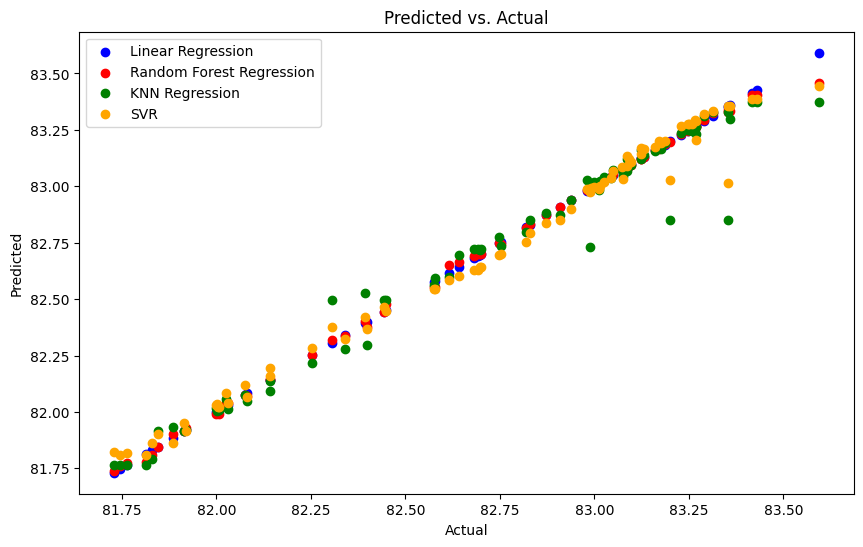

In [61]:
# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Regression')
plt.scatter(y_test, y_pred_knn, color='green', label='KNN Regression')
plt.scatter(y_test, y_pred_svr, color='orange', label='SVR')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.legend()
plt.show()